In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [2]:
data = pd.read_csv('Data/Social_Network_Ads.csv')

In [3]:
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


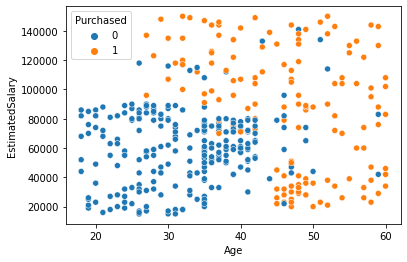

In [36]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data)
plt.show()

In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
x = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

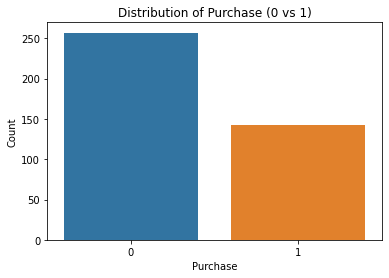

In [16]:
import matplotlib.pyplot as plt
sns.countplot(x='Purchased', data=data)
plt.title('Distribution of Purchase (0 vs 1)')
plt.xlabel('Purchase')
plt.ylabel('Count')
plt.show()

# Scaling

In [10]:
sc = StandardScaler()

In [11]:
sc.fit(x)

StandardScaler()

In [13]:
x_processed = pd.DataFrame(sc.transform(x), columns=x.columns)

In [14]:
x_processed.head(2)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.2, random_state=42)

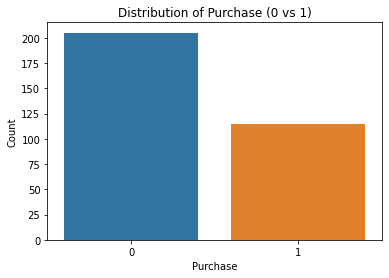

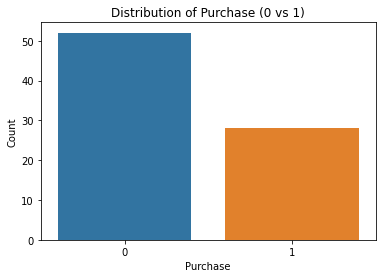

In [21]:

sns.countplot(x=y_train)
plt.title('Distribution of Purchase (0 vs 1)')
plt.xlabel('Purchase')
plt.ylabel('Count')
plt.show()

sns.countplot(x=y_test)
plt.title('Distribution of Purchase (0 vs 1)')
plt.xlabel('Purchase')
plt.ylabel('Count')
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier()

In [24]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
dt.score(X_test, y_test)

0.8375

In [26]:
dt1 = DecisionTreeClassifier(criterion='entropy')

In [27]:
dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
dt1.score(X_test, y_test)*100

83.75

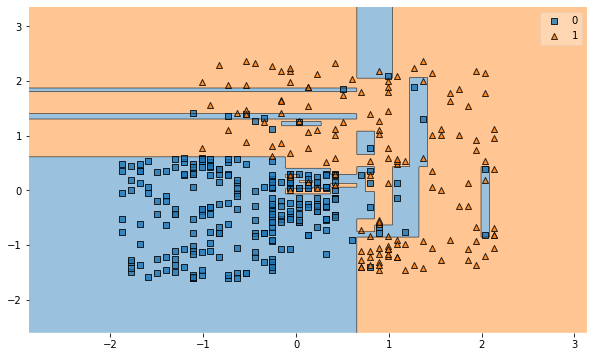

In [41]:
plt.figure(figsize=(10,6))
plot_decision_regions(x_processed.to_numpy(), y.to_numpy(), clf=dt)
plt.show()

In [30]:

from sklearn.tree import plot_tree

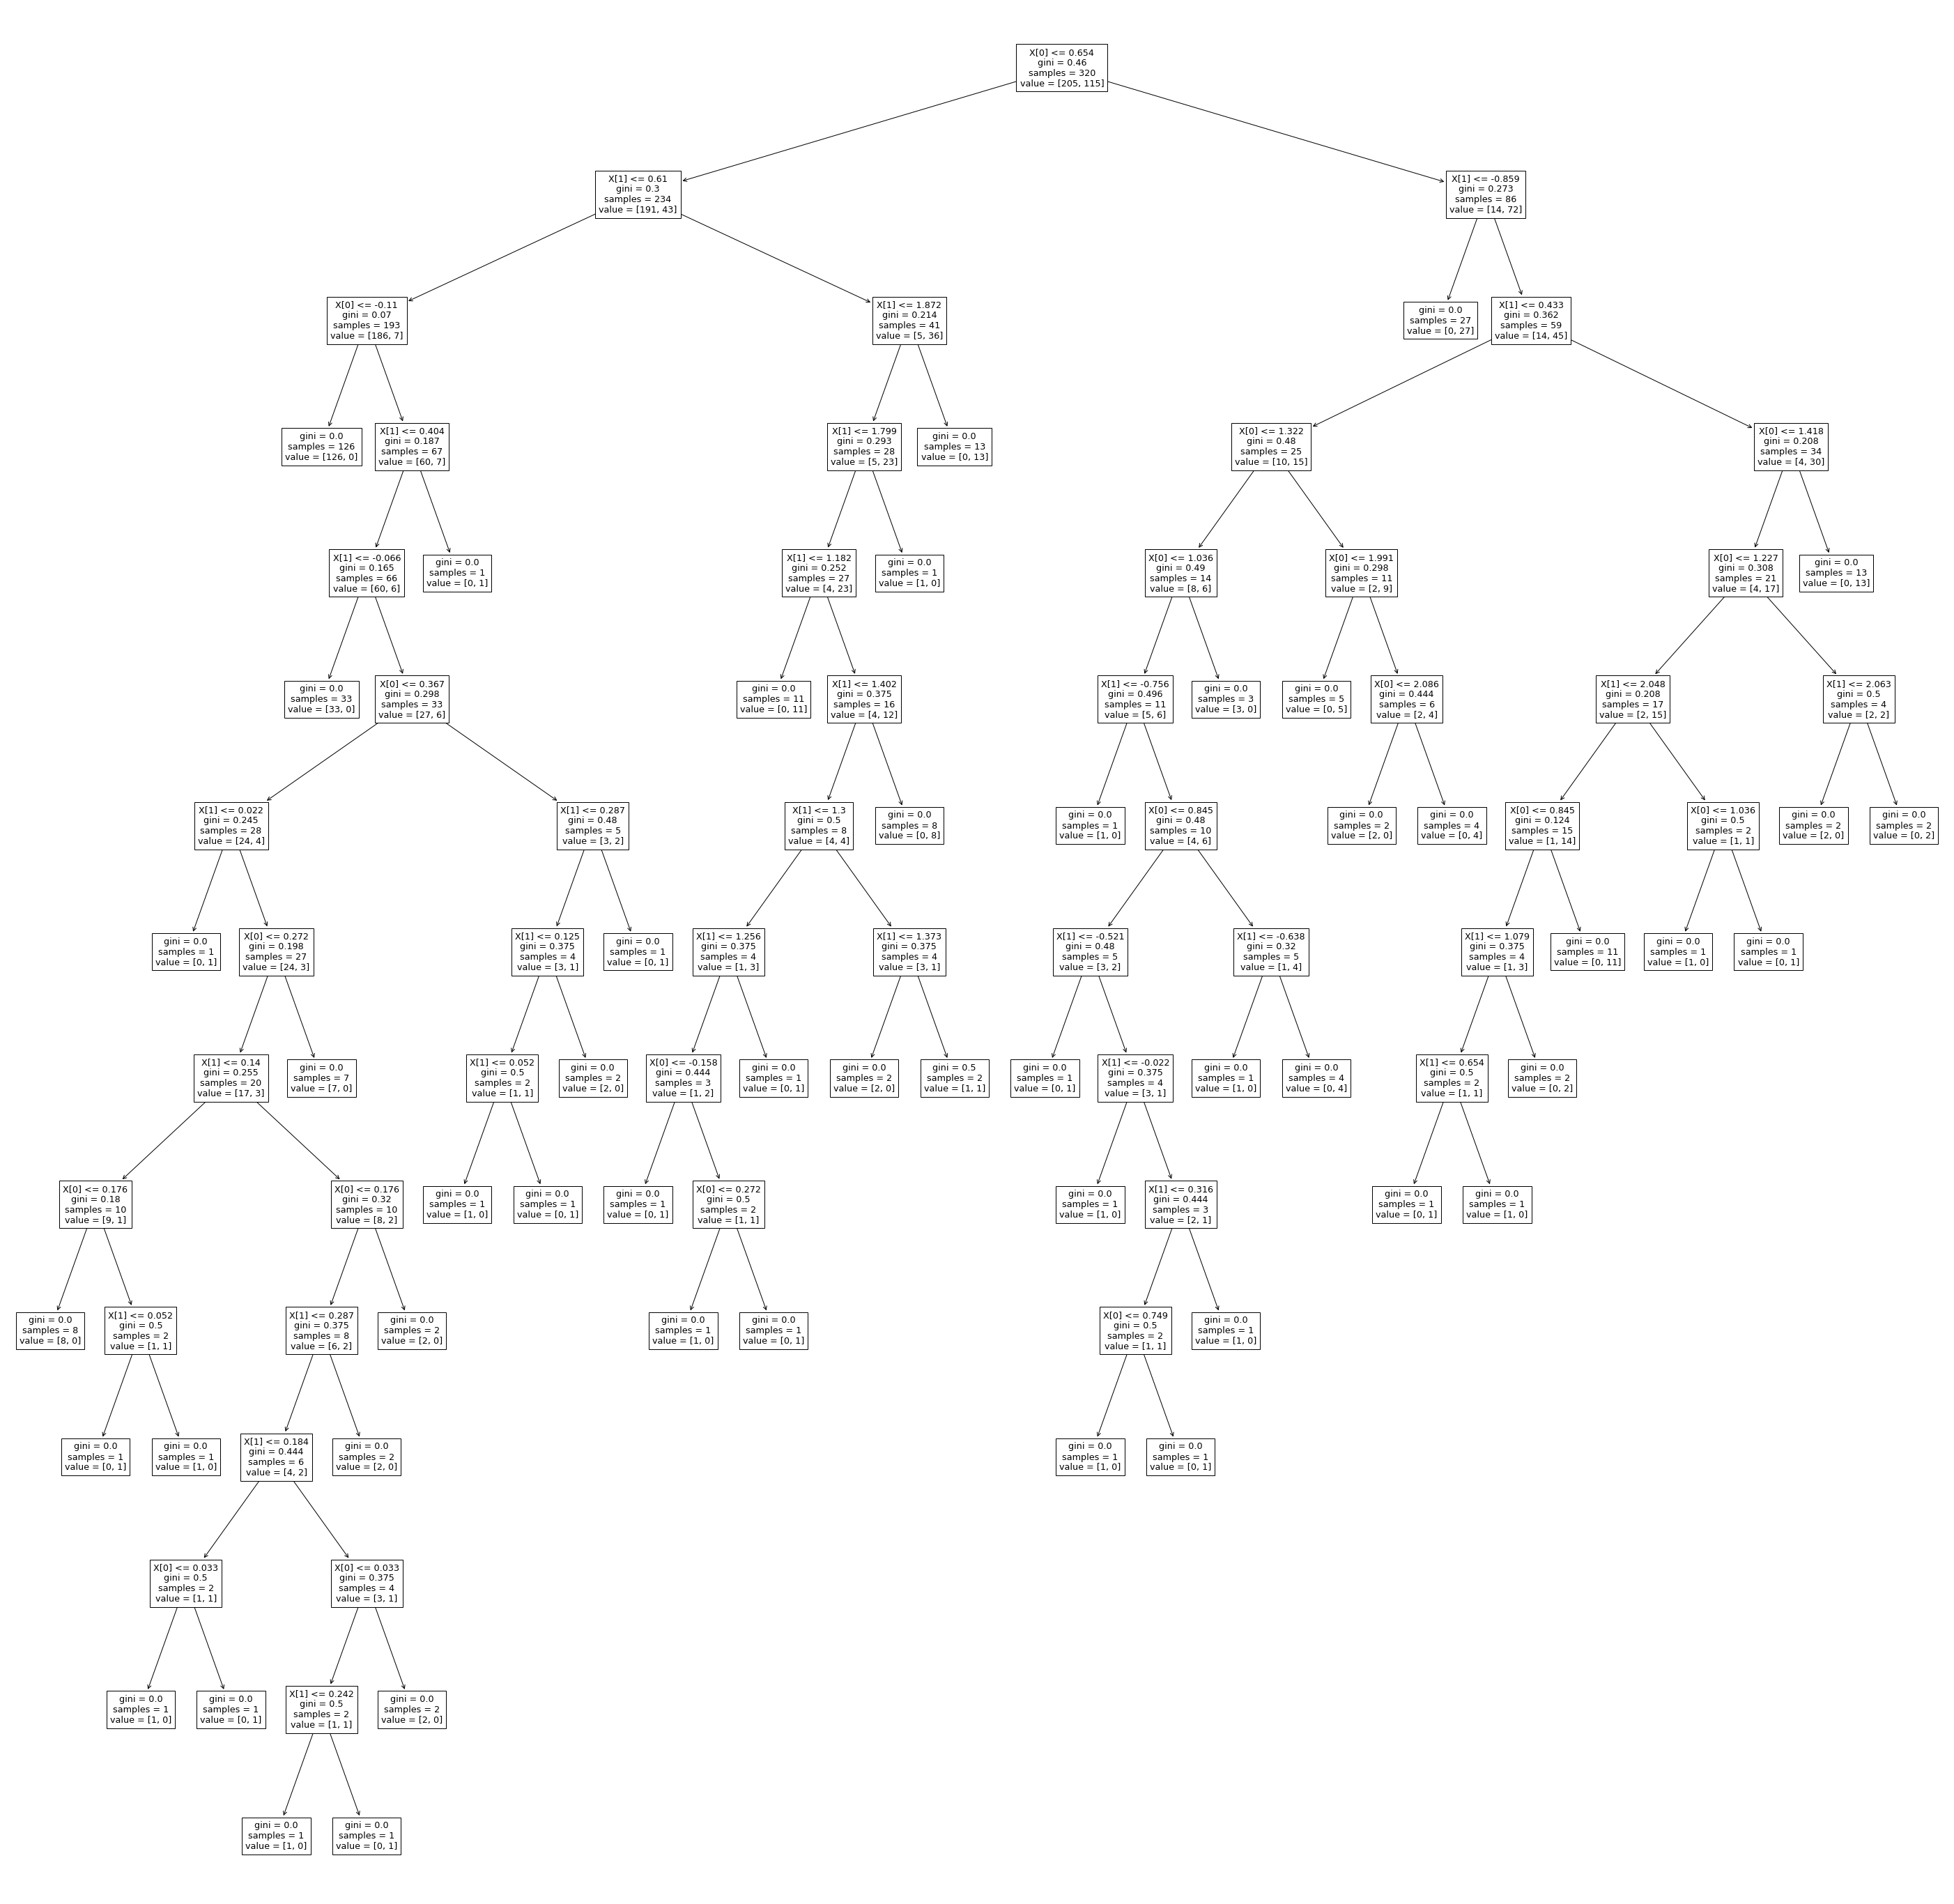

In [35]:
plt.figure(figsize=(50, 50))
plot_tree(dt)
plt.savefig('DecisionTree.png')
plt.show()